In [25]:
import numpy as np
import pandas as pd
import scipy.optimize
import matplotlib.pyplot as plt

In [18]:
def double_logistic(x, a, b, c, d, e, f):
    return a / (1 + np.exp(-b * (x - c))) + d / (1 + np.exp(-e * (x - f)))

In [33]:
ds_nonneg = ds_year.loc[ds_year['NDVI'] > 0]
Times = pd.DatetimeIndex(ds_nonneg['formatted_time']).dayofyear.values
NDVIs = ds_nonneg['NDVI'].values

params, _ = scipy.optimize.curve_fit(double_logistic, Times, NDVIs)

C:\Users\wlwc1989\AppData\Local\Temp\ipykernel_18688\2676897598.py:2: RuntimeWarning: overflow encountered in exp
  return a / (1 + np.exp(-b * (x - c))) + d / (1 + np.exp(-e * (x - f)))
C:\Users\wlwc1989\AppData\Local\Temp\ipykernel_18688\1413816746.py:5: OptimizeWarning: Covariance of the parameters could not be estimated
  params, _ = scipy.optimize.curve_fit(double_logistic, Times, NDVIs)


In [52]:
def Maximum_Value_Composite(df, variable, window_size=8):
    #time_period = (pd.DatetimeIndex(df['formatted_time']).max() - pd.DatetimeIndex(df['formatted_time']).min()).days
    df['Is in MVI?'] = np.nan
    time_counter = pd.DatetimeIndex(df['formatted_time']).min()
    while time_counter < pd.DatetimeIndex(df['formatted_time']).max():
        
        time_counter += pd.Timedelta(days=1)
    MVC_loc = df[variable].rolling(window=window_size, center=True).apply(lambda x: x.idxmax())#.max() 
    MVC = df.loc[np.isin(df.index, MVC_loc)]
    return MVC, MVC_loc

In [80]:
def max_in_region(df):
    if len(df) == 0:
        return df
    else:
        return df.loc[[df['NDVI'].idxmax()]]

In [104]:
def max_value_int(df, window_size=8):
    ds_year['formatted_time'] = pd.DatetimeIndex(ds_year['formatted_time'])
    return ds_year.groupby(pd.Grouper(key='formatted_time',freq=f'{window_size}D')).apply(max_in_region)

In [112]:
dfds = max_value_int(ds_year, window_size=11)
#ds_nonneg = dfds.loc[dfds['NDVI'] > 0]
Times = pd.DatetimeIndex(dfds['formatted_time']).dayofyear.values
NDVIs = dfds['NDVI'].values

params, _ = scipy.optimize.curve_fit(double_logistic, Times/365, NDVIs)

C:\Users\wlwc1989\AppData\Local\Temp\ipykernel_18688\2257597801.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds_year['formatted_time'] = pd.DatetimeIndex(ds_year['formatted_time'])
C:\Users\wlwc1989\AppData\Local\Temp\ipykernel_18688\2257597801.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  return ds_year.groupby(pd.Grouper(key='formatted_time',freq=f'{window_size}D')).apply(max_in_region)
C:\Users\wlwc1989\AppData\Local\Temp\ipykernel_18688\267

In [87]:
ds_year['formatted_time'] = pd.DatetimeIndex(ds_year['formatted_time'])
dfds = ds_year.groupby(pd.Grouper(key='formatted_time',freq='8D')).apply(max_in_region)


C:\Users\wlwc1989\AppData\Local\Temp\ipykernel_18688\1648229502.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds_year['formatted_time'] = pd.DatetimeIndex(ds_year['formatted_time'])
C:\Users\wlwc1989\AppData\Local\Temp\ipykernel_18688\1648229502.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  dfds = ds_year.groupby(pd.Grouper(key='formatted_time',freq='8D')).apply(max_in_region)


In [85]:
dfds = dfds.set_index('formatted_time')

In [65]:
print((pd.DatetimeIndex(ds_year['formatted_time']).max() - pd.DatetimeIndex(ds_year['formatted_time']).min()).days)

359


In [53]:
ddd, ddf = Maximum_Value_Composite(ds_year, 'NDVI')

In [ ]:
ddd

In [54]:
ddf

0        NaN
1        NaN
2        NaN
3        NaN
4        4.0
       ...  
105    101.0
106    109.0
107      NaN
108      NaN
109      NaN
Name: NDVI, Length: 110, dtype: float64

In [98]:
params

array([  0.29506713,  15.61977155,   0.1674207 ,   0.22500325,
       -68.65061133,   0.83387599])

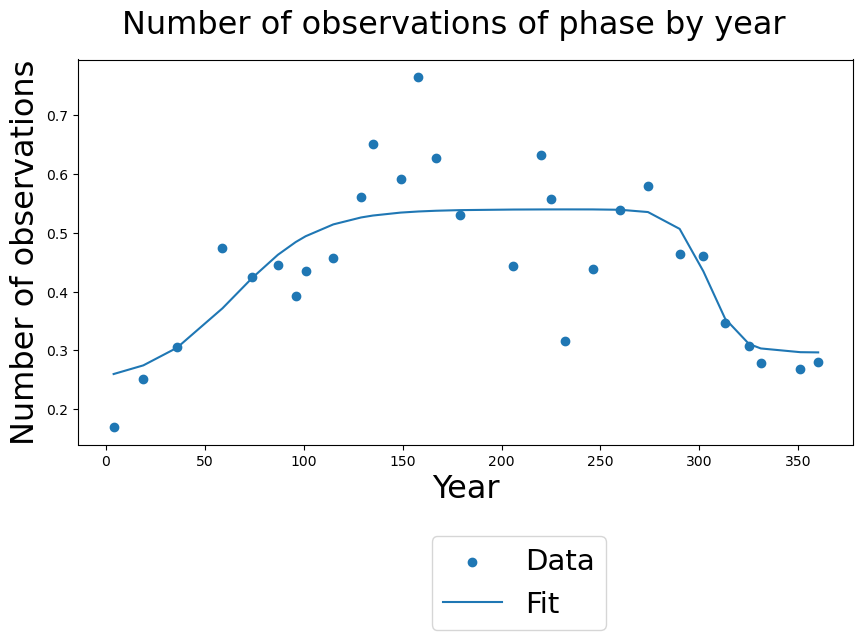

In [113]:
font_size = 23
fig, ax = plt.subplots(figsize = (10, 5))
ax.scatter(Times, NDVIs, label = 'Data')
ax.plot(Times, double_logistic(Times/365, *params), label = 'Fit')
ax.set_xlabel('Year', fontsize = font_size)
ax.set_ylabel('Number of observations', fontsize = font_size)
fig.suptitle('Number of observations of phase by year', fontsize = font_size)
ax.legend(fontsize = font_size - 2, bbox_to_anchor=(0.7, -0.2))

In [ ]:
def fit_many_curves(ds):
    

In [2]:
ds = pd.read_csv('C:\\Users\\wlwc1989\\Documents\\Phenology_Test_Notebooks\\earth_engine_MP\\Saved_files\\MODIS\\satdata0.csv')

In [6]:
station = ds['Stations_Id'].unique()[0]

In [10]:
def normalized_difference(x1, x2):
    return (x1 - x2) / (x1 + x2)

In [16]:
ds_station = ds.loc[(ds['Stations_Id'] == station)]
ds_year = ds_station.loc[pd.DatetimeIndex(ds_station['formatted_time']).year  == 2020]


In [17]:
ds_year

,Unnamed: 0,Time,lat,lon,Stations_Id,median sur_refl_b01,median sur_refl_b02,median sur_refl_b03,median sur_refl_b04,formatted_time,NDVI
0,0,1577836800000,54.7833,9.4333,7501,1080.0,1386.0,1118.0,1089.0,2020-01-01-00-00-00,0.124088
1,3,1578096000000,54.7833,9.4333,7501,502.0,707.0,589.0,537.0,2020-01-04-00-00-00,0.169562
2,18,1579392000000,54.7833,9.4333,7501,827.0,1384.0,542.0,786.0,2020-01-19-00-00-00,0.251922
3,35,1580860800000,54.7833,9.4333,7501,546.0,1028.0,353.0,525.0,2020-02-05-00-00-00,0.306226
4,58,1582848000000,54.7833,9.4333,7501,146.0,410.0,83.0,68.0,2020-02-28-00-00-00,0.474820
...,...,...,...,...,...,...,...,...,...,...,...
105,335,1606780800000,54.7833,9.4333,7501,2637.0,2091.0,3925.0,3149.0,2020-12-01-00-00-00,-0.115482
106,350,1608076800000,54.7833,9.4333,7501,665.0,1154.0,613.0,675.0,2020-12-16-00-00-00,0.268829
107,353,1608336000000,54.7833,9.4333,7501,1269.0,1712.0,1316.0,1299.0,2020-12-19-00-00-00,0.148608
108,356,1608595200000,54.7833,9.4333,7501,1285.0,983.0,2211.0,1672.0,2020-12-22-00-00-00,-0.133157


In [11]:
ds['NDVI'] = (ds['median sur_refl_b02'] - ds['median sur_refl_b01'])/(ds['median sur_refl_b02'] + ds['median sur_refl_b01'])

In [34]:
min(ds['formatted_time'])

'2020-01-01-00-00-00'

In [33]:
pd.DatetimeIndex(ds['formatted_time']).year#.astype('datetime64[Y]')

Index([2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020,
       ...
       2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022],
      dtype='int32', name='formatted_time', length=15346)

In [27]:
type(pd.to_datetime(ds['formatted_time'])[0])

C:\Users\wlwc1989\AppData\Local\Temp\ipykernel_22204\4040176187.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  type(pd.to_datetime(ds['formatted_time'])[0])


pandas._libs.tslibs.timestamps.Timestamp